In [1]:
library(RPostgreSQL)
library(tidyverse)

Warning message:
"package 'RPostgreSQL' was built under R version 4.3.3"
Loading required package: DBI

Warning message:
"package 'tidyverse' was built under R version 4.3.3"
Warning message:
"package 'ggplot2' was built under R version 4.3.3"
Warning message:
"package 'readr' was built under R version 4.3.3"
Warning message:
"package 'forcats' was built under R version 4.3.3"
Warning message:
"package 'lubridate' was built under R version 4.3.3"
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
data_dir <- file.path("..", "data")
sql_dir <- file.path("..", "sql")

In [3]:
con <- dbConnect(RPostgres::Postgres(),
                  host = "127.0.0.1",
                  port = 5432,
                  dbname = "mimiciv",
                  user = "postgres",
                  password = "123")
full_data = dbGetQuery(con, "select*from mimiciv_hosp.merged_data_gcs")


In [4]:

full_data = dbGetQuery(con, "select*from mimiciv_hosp.merged_data_gcs")
head(full_data)





,stay_id,hadm_id,subject_id,gender,age,sapsii,icu_intime,icu_outtime,weight,sofa_24hours,⋯,lab_sodium_flag,lab_bun_flag,lab_bicarbonate_flag,lab_bnp_flag,lab_pco2_flag,lab_creatinine_flag,lab_potassium_flag,lab_troponin_flag,lab_po2_flag,lab_lactate_flag
,<int>,<int>,<int>,<chr>,<dbl>,<int>,<dttm>,<dttm>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,38302142,20475690,13620446,F,66.04835,31,2159-01-21 01:45:32,2159-01-25 14:09:02,138.0,1,⋯,1,1,1,0,1,1,1,0,1,1
2,31869153,21383344,15359363,F,41.91122,39,2166-12-02 16:08:45,2166-12-05 02:10:02,70.0,0,⋯,1,1,1,0,0,1,1,0,0,0
3,31501167,20944291,12162143,F,87.59137,35,2174-08-05 00:49:12,2174-08-06 16:13:22,65.0,1,⋯,1,1,1,0,1,1,1,0,1,1
4,39256124,24959920,18226317,M,66.88656,28,2130-11-20 19:28:29,2130-11-25 12:42:59,88.0,3,⋯,1,1,1,0,0,1,1,0,0,0
5,31132695,28164203,15928453,F,44.39155,55,2113-05-24 00:14:32,2113-05-29 14:24:45,45.9,10,⋯,1,1,1,0,1,1,1,0,1,1
6,39784690,23246205,16810503,M,56.61848,30,2149-08-14 21:32:37,2149-08-21 12:15:14,80.0,3,⋯,1,1,1,0,1,1,1,0,1,1


In [5]:

head(full_data)

,stay_id,hadm_id,subject_id,gender,age,sapsii,icu_intime,icu_outtime,weight,sofa_24hours,⋯,lab_sodium_flag,lab_bun_flag,lab_bicarbonate_flag,lab_bnp_flag,lab_pco2_flag,lab_creatinine_flag,lab_potassium_flag,lab_troponin_flag,lab_po2_flag,lab_lactate_flag
,<int>,<int>,<int>,<chr>,<dbl>,<int>,<dttm>,<dttm>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,38302142,20475690,13620446,F,66.04835,31,2159-01-21 01:45:32,2159-01-25 14:09:02,138.0,1,⋯,1,1,1,0,1,1,1,0,1,1
2,31869153,21383344,15359363,F,41.91122,39,2166-12-02 16:08:45,2166-12-05 02:10:02,70.0,0,⋯,1,1,1,0,0,1,1,0,0,0
3,31501167,20944291,12162143,F,87.59137,35,2174-08-05 00:49:12,2174-08-06 16:13:22,65.0,1,⋯,1,1,1,0,1,1,1,0,1,1
4,39256124,24959920,18226317,M,66.88656,28,2130-11-20 19:28:29,2130-11-25 12:42:59,88.0,3,⋯,1,1,1,0,0,1,1,0,0,0
5,31132695,28164203,15928453,F,44.39155,55,2113-05-24 00:14:32,2113-05-29 14:24:45,45.9,10,⋯,1,1,1,0,1,1,1,0,1,1
6,39784690,23246205,16810503,M,56.61848,30,2149-08-14 21:32:37,2149-08-21 12:15:14,80.0,3,⋯,1,1,1,0,1,1,1,0,1,1


In [7]:


 features <- c("gender", "age", "gcs_include", "weight", "sapsii", "sofa_24hours", "survival_days", "infection",
              "vs_map_first", "vs_heart_rate_first", "vs_temp_first", "vs_cvp_first",
              "lab_wbc_first", "lab_hemoglobin_first", "lab_platelet_first",
              "lab_sodium_first", "lab_potassium_first", "lab_bicarbonate_first",
              "lab_chloride_first", "lab_bun_first", "lab_lactate_first",
              "lab_creatinine_first", "lab_ph_first", "lab_po2_first", "lab_pco2_first",
              "lab_troponin_first", "lab_creatinine_kinase_first")         

In [8]:
## missing data 
missing <- full_data %>%
dplyr::select(features) %>%
summarise_all(funs(sum(is.na(.)) / length(.) * 100)) %>%
gather("cov", "na") %>%
mutate(cov = str_replace_all(cov, "_", " ")) %>%
mutate(cov_ = cov) %>%
mutate(cov = str_replace_all(cov, "lab|vs|flag|icd|first", "")) %>%
mutate(cov = str_replace_all(cov, "\\s+$|^\\s+", "")) %>%
mutate(cov = case_when(
    grepl("icd|lab", cov_) ~ toupper(cov),
    TRUE ~ tools::toTitleCase(cov)
)) %>%
mutate(cov = case_when(
    cov == "Weight" ~ "Weight",
    cov == "Saps" ~ "SAPS Score",
    cov == "Sofa" ~ "SOFA Score",
    cov == "Vent" ~ "Ventilation Use (1st 24 Hrs)",
    cov == "Vaso" ~ "Vasopressor Use (1st 24 Hrs)",
    cov == "gcs_include" ~ "GCs",
    cov == "Temp" ~ "Temperature",
    cov == "Map" ~ "MAP",
    cov == "Cvp" ~ "CVP",
    TRUE ~ cov
)) %>%
dplyr::select(-cov_) %>%
mutate(flag = na > 50)

missing

Warning message:
"Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(features)

  # Now:
  data %>% select(all_of(features))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>."
Warning message:
"`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))"


cov,na,flag
<chr>,<dbl>,<lgl>
Gender,0.0000000,FALSE
Age,0.0000000,FALSE
Gcs Include,0.0000000,FALSE
Weight,0.8634401,FALSE
Sapsii,0.0000000,FALSE
Sofa 24hours,0.0000000,FALSE
Survival Days,0.0000000,FALSE
Infection,26.2213133,FALSE
MAP,0.2272211,FALSE


In [9]:
options(repr.plot.width = 10, repr.plot.height = 6.2)

Warning message:
"The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4."


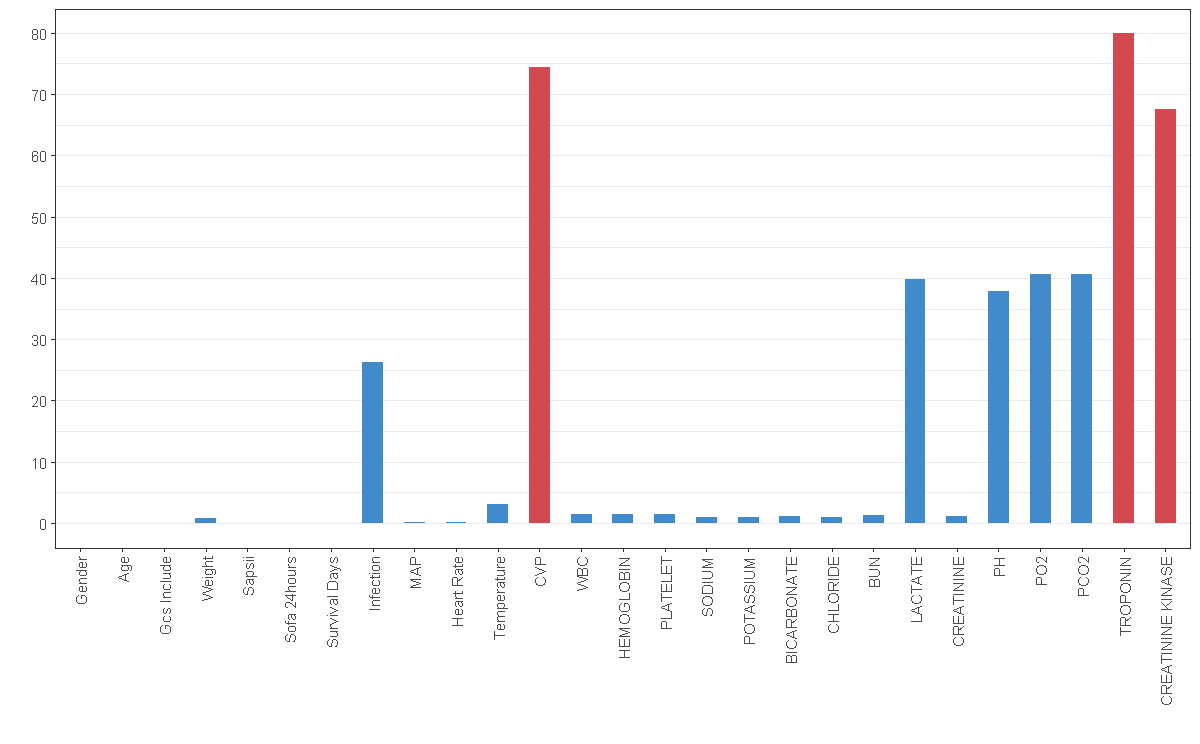

In [10]:
missing %>%
ggplot() +
geom_col(aes(x = cov, y = na, fill = as.character(flag)), width = .5) +
scale_x_discrete(limits = missing$cov) +
scale_y_continuous(breaks = seq(0, 100, 10)) +
scale_fill_manual(values = c(rgb(66, 139, 202, maxColorValue = 255),
                             rgb(210, 73, 80, maxColorValue = 255))) +
labs(x = "", y = "") +
guides(fill = FALSE) +
theme_bw() +
theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = .5),
      panel.grid.minor.x = element_blank(), panel.grid.major.x = element_blank())

In [11]:
data.table::fwrite(missing %>% dplyr::select(-flag), file.path(data_dir, "missing.csv"))